 <font color=red size=4> 
iFood DA/DArq Case Solution / Modelo Preditivo de Classificação / Éricka Caracas de Castro Santos
 </font>

In [14]:
import pandas as pd
import numpy as np
from   sklearn.model_selection import train_test_split, cross_val_predict
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# Função para calcular idade
def calcular_idade(ano_nascimento):
    ano_corrente = 2024  # Ano atual
    idade = ano_corrente - ano_nascimento
    return idade



In [16]:
# Carregar o dataset de clientes a partir da URL do Github fornecida.
url = 'https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv'
data = pd.read_csv(url)

# Tratamento do tipo do campo "Income" e preenchimento dos valores nulos com um valor padrão.
data['Income'] = data['Income'].fillna(0).astype('int64')

print(data.info(verbose=True))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [17]:
# Criar faixa etária para melhor visualização na importância das variáveis.

# Calculando a idade dos clientes a partir da variável 'Year_Birth'.
data['Idade'] = data['Year_Birth'].apply(calcular_idade)

# Definindo os intervalos, legendas e coluna para faixas etárias.
bins = [0, 20, 36, 51, 67, np.inf]
labels = ['Menor que 20 anos', '20-35 anos', '36-50 anos', '51-66 anos', 'Maior que 66 anos']
data['Faixa_Etaria'] = pd.cut(data['Idade'], bins=bins, labels=labels, right=False)


In [18]:
# Pré-processamento das variáveis categóricas
data = pd.get_dummies(data, columns=['Education', 'Marital_Status', 'Faixa_Etaria'])


In [19]:
# Separar features e target
X = data.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Response','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'], axis=1) 
y = data['Response']



In [20]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Treinar o modelo 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# Fazer previsões
y_pred = model.predict(X_test)


In [23]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = round(accuracy * 100, 2)
print("Acurácia do modelo:", accuracy_percent, "%")

Acurácia do modelo: 86.61 %


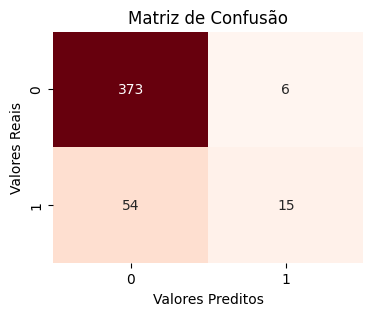

In [27]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()


In [25]:
# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       379
           1       0.71      0.22      0.33        69

    accuracy                           0.87       448
   macro avg       0.79      0.60      0.63       448
weighted avg       0.85      0.87      0.83       448



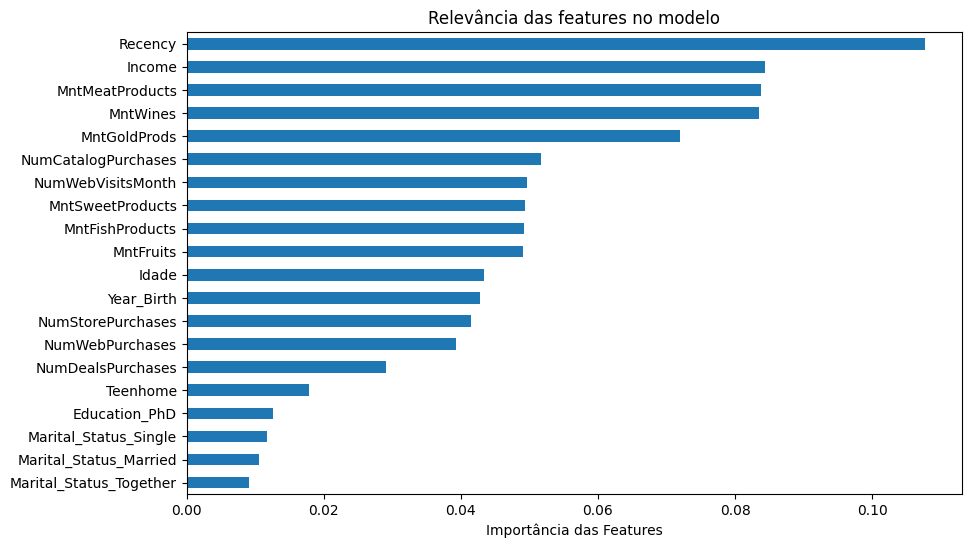

In [33]:

# Analisar a importância das variáveis no modelo
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Visualizar as 10 características mais importantes
plt.figure(figsize=(10, 6))
feature_importances_sorted[:20].sort_values().plot(kind='barh')
plt.xlabel('Importância das Features')
plt.title('Relevância das features no modelo')
plt.show()



<font color=black size=4>

**_Em análise da importância das variáveis no modelo temos alguns exemplos como dias da última compra('Recency') e média do valor gasto com 
vinhos ('MntWines) no topo. 
Conforme apresentado na análise exploratória das variáveis, clientes que realizaram compras nos últimos 30 dias e clientes que tiveram gastos 
mais altos com vinhos nos últimos anos tiveram uma tendência maior a aceitar a campanha, o que justifica a relevância das features no modelo._**
</font>

> <font color=black size=6>

> **Apesar do alto percentual da acurácia para o modelo (87%), verificamos que o recall está bem baixo, com 26%, o que representa que da base total  menos da metade dos clientes realmente são o público alvo e aceitariam a campanha.**

>**Para evitar futuras ações de marketing com o mesmo resultado é importante considerar as características dos perfis comportamentais e de compras dos  clientes, sempre considerando sua representatividade no total, e realizar campanhas focadas nesse perfis traçados para termos uma taxa de adesão precisa,maior e sem tanto risco de atingir somente nichos específicos com pouca representatividade e retorno.**
> </font>
